
# 线性回归


In [2]:
import numpy as np
import pandas as pd
from collections import OrderedDict
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# 建立数据集

In [41]:
#建立数据集
Data = {
    '父母身高平均值':[150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174,
       176, 178, 180, 182, 184, 186, 188],
    '子代身高':[160, 166, 161, 156, 168, 170, 173, 171, 175, 168, 169, 181, 175, 179, 174, 183, 187, 187, 182, 179]   
}
#排序
OrderData = OrderedDict(Data)

#构造数表
DataDf = pd.DataFrame(OrderData)
DataDf.head()

,父母身高平均值,子代身高
0,150,160
1,152,166
2,154,161
3,156,156
4,158,168


In [42]:
Data_X=DataDf.loc[:,'父母身高平均值']
Data_y=DataDf.loc[:,'子代身高']

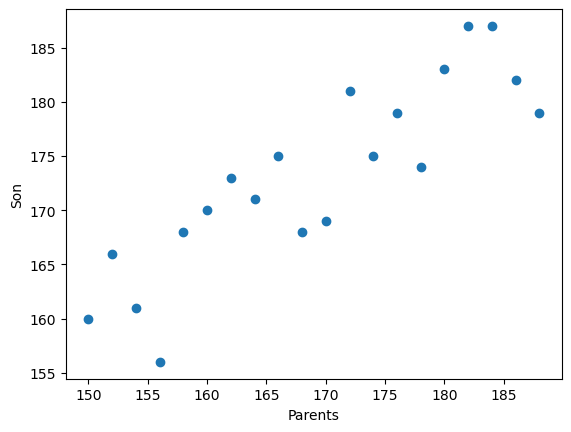

In [43]:
#散点图，X表示特征，y表示标签
plt.scatter(Data_X,Data_y,label='exam data')
plt.xlabel('Parents')
plt.ylabel('Son')
plt.show()

# 建立训练数据和测试数据

In [50]:
#建立训练数据和测试数据
X_train,X_test,y_train,y_test = train_test_split(Data_X,Data_y,train_size=0.8)
print('原始数据特征',Data_X.shape,
     '训练数据特征',X_train.shape,
     '测试数据特征',X_test.shape)

print('原始数据标签',Data_y.shape,
     '训练数据标签',y_train.shape,
     '测试数据标签',y_test.shape)






原始数据特征 (20,) 训练数据特征 (16,) 测试数据特征 (4,)
原始数据标签 (20,) 训练数据标签 (16,) 测试数据标签 (4,)


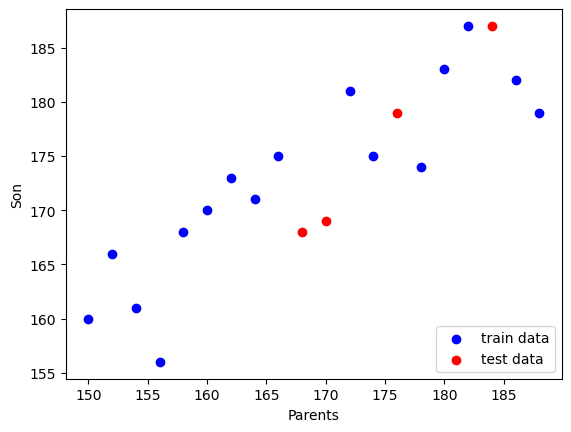

In [62]:
#绘制训练和测试的散点图
plt.scatter(X_train,y_train,color ='b',label = 'train data')
plt.scatter(X_test,y_test,color ='r',label = 'test data')
plt.legend(loc = 4 )
plt.xlabel('Parents')
plt.ylabel('Son')
plt.show()

# 训练模型

In [63]:
#由于sklearn要求输入特征为二维数组，所以要把1维特征转换为二维数组类型
X_train = X_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

In [64]:
#导入线性回归
from sklearn.linear_model import LinearRegression
#建立线性回归模型
model = LinearRegression()
#训练模型
#fit函数，传入训练数据的特征X和标签y
model.fit(X_train,y_train)

LinearRegression()

In [67]:
#建立拟合曲线 y=kx+b
b= model.intercept_
k = model.coef_
print('截距为b={},回归系数k={}'.format(b,k))

截距为b=[69.62846522],回归系数k=[[0.61407329]]


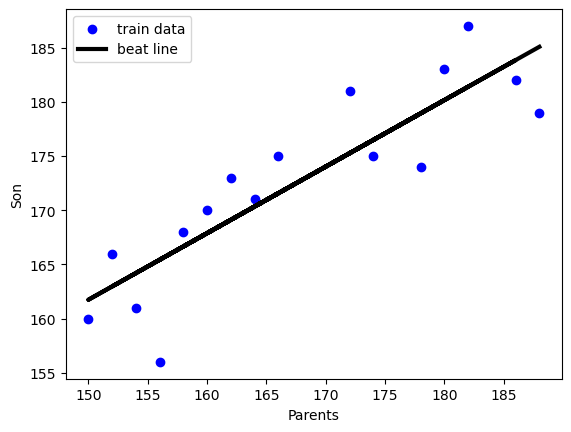

In [70]:
#训练数据散点图
plt.scatter(X_train,y_train,color = 'b',label = 'train data')

#训练数据的预测
y_train_pred = model.predict(X_train)

#绘制拟合曲线
plt.plot(X_train,y_train_pred,color = 'black',linewidth = '3',label = 'beat line')
plt.legend(loc = 2)
plt.xlabel('Parents')
plt.ylabel('Son')
plt.show()

# 评估模型

In [72]:
#相关系数：corr返回结果是一个数据框，存放的是相关系数矩阵
rDf=DataDf.corr()
print('相关系数矩阵；\n{}'.format(rDf))
#转换矩阵
X_test=X_test.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)
#评估模型：决定系数 R^2
model.score(X_test,y_test)


相关系数矩阵；
          父母身高平均值      子代身高
父母身高平均值  1.000000  0.870528
子代身高     0.870528  1.000000


0.7155145671177332

# 决定系数R^2为71.5%，代表71.5%的子代身高y的波动可以由回归线描述